# **Model**

The following figure presents a schematic representation of the system, which includes two coordinate frames: the **world frame** (in red) and the **body frame** (in blue).

The angle $\delta$ is a constant parameter, fixed at 30°, and represents the orientation angle of the body.

The angle $\phi$ represents the orientation of the robot with respect to the world frame. Specifically, it denotes the angle between the world frame’s $x$-axis and the body frame’s $x_b$-axis, measured counterclockwise.

Each wheel is associated with a force $f$ (in newtons) and a motor shaft angular velocity $\omega$ (in radians per second).

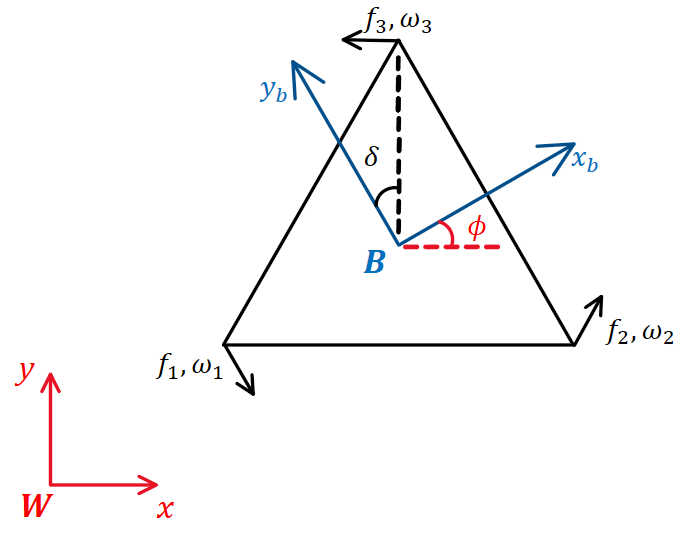

##***Kinematics***

### Analysis

To convert from one frame to another, we use the rotation matrix like this:
$$
\begin{bmatrix}
v_{bx} \\
v_{by} \\
\omega_{b}
\end{bmatrix}
=
\begin{bmatrix}
 cos(\phi) & sin(\phi) & 0 \\
-sin(\phi) & cos(\phi) & 0 \\
   0       & 0         & 1
\end{bmatrix}
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi}
\end{bmatrix}
$$

\begin{equation} \tag{1}
\longrightarrow
\dot{q}_b = R_{\phi} \dot{q}_r
\end{equation}

From the above diagram, we can get the Motor shaft speed of each wheel in terms of the world frame ($x,y,\phi$) Geometricaly:
$$
\frac{r}{n} \omega_1 = - v_{by} + d\omega_b \\
\frac{r}{n} \omega_2 =  cos(\delta) v_{bx} + sin(\delta) v_{by} + d\omega_b \\
\frac{r}{n} \omega_3 = -cos(\delta) v_{bx} + sin(\delta) v_{by} + d\omega_b
$$

In a matrix form:

$$
\begin{bmatrix}
\omega_1 \\
\omega_2 \\
\omega_3
\end{bmatrix}
=
\frac{n}{r}
\begin{bmatrix}
0             &     -1        &  d \\
 cos(\delta)  &  sin(\delta)  &  d  \\
-cos(\delta)  &  sin(\delta)  &  d
\end{bmatrix}
\begin{bmatrix}
v_{bx} \\
v_{by} \\
\omega_{b}
\end{bmatrix}
=
\frac{n}{r}
\begin{bmatrix}
0             &     -1        &  d \\
 cos(\delta)  &  sin(\delta)  &  d  \\
-cos(\delta)  &  sin(\delta)  &  d
\end{bmatrix}
\begin{bmatrix}
 cos(\phi) & sin(\phi) & 0 \\
-sin(\phi) & cos(\phi) & 0 \\
   0       & 0         & 1
\end{bmatrix}
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi}
\end{bmatrix}
$$

$$ \tag{2}
\longrightarrow
\dot{q}_w = \frac{n}{r}HR_{\phi}\dot{q}_r
$$

where:
- $r$: wheel radious
- $n$: gear reduction

**Note:** Actually, the real definition of $\phi$ is: $\phi = \phi + \delta$. This just for the matrices that depend of $\phi$

See the image to undertand why.

## ***Dynamics***

### Considering three wheels equal

From the above diagram and using the second Newton law, we can obtain geometricaly:
$$M\dot{v}_{bx} = f_2 cos(\delta) - f_3 cos(\delta) \\
M\dot{v}_{by} = -f_1 + f_2 sin(\delta) + f_3 sin(\delta)\\
I\dot{\omega}_{b} = (f_1 + f_2 + f_3)d$$

In a matrix form:

$$\begin{bmatrix}
\dot{v}_{bx} \\
\dot{v}_{by} \\
\dot{\omega}_{b}
\end{bmatrix}
=
\begin{bmatrix}
1/M &  0  & 0 \\
0   & 1/M & 0 \\
0   &  0  & 1/I_n
\end{bmatrix}
\begin{bmatrix}
 0  & cos(\delta) & -cos(\delta) \\
-1  & sin(\delta) &  sin(\delta) \\
 d  &   d         &       d
\end{bmatrix}
\begin{bmatrix}
f_1  \\
f_2  \\
f_3
\end{bmatrix}$$

$$ \tag{3}
\longrightarrow
\ddot{q}_b = DH^{T}f$$

To obtain the force $f$, we use the motor dinamics:
$$
L_a \frac{di_a}{dt} + R_a i_a + K_e \omega = E
$$

Neglecting the motor circuits dynamics because, compared to motor mechanical dynamics, the are very fast $\frac{di_a}{dt} = 0$, then we have:
$$
i_a = \frac{1}{R_a} (E - K_e \omega)
$$
where:
- $i_a$: armature current
- $R_a$: armature resistance
- $K_e$: back emf constant of the motor

In terms of torque:
$$
T = K_t i_a = \frac{K_t}{R_a} (E - K_e \omega)
$$
where:
- $K_t$: motor torque constant

From the relation between toque and force, and asuming $K_e = K_t$:
$$
f = \frac{Tn}{r} = \frac{n K}{r R_a} (E - K \omega)
$$

In a more generalized form:
$$
f =
\begin{bmatrix}
f_1 \\
f_2 \\
f_3
\end{bmatrix}
 = \frac{n K}{r R_a}
\begin{bmatrix}
E1 \\
E2 \\
E3
\end{bmatrix}
-
\frac{n K^2}{r R_a}
\begin{bmatrix}
\omega_1 \\
\omega_2 \\
\omega_3
\end{bmatrix}
=
\frac{n K}{r R_a}  E
-
\frac{n K^2}{r R_a}
\dot{q}_w
$$

Using $(2)$:
$$
f = \frac{n K}{r R_a} E - \frac{n^2 K^2}{r^2 R_a} HR_{\phi}\dot{q}_r
$$

Replacing the above in $(3)$:

$$ \tag{4}
\ddot{q}_b = DH^{T} ( \frac{n K}{r R_a} E - \frac{n^2 K^2}{r^2 R_a} HR_{\phi}\dot{q}_r )
$$

Since the trajectory tracking problem is formulated with respect to the generalized coordinates $q_r$, we seek a model expressed in terms of inputs and quantities defined in the world frame.

The question then arises: how can we express $\ddot{q}_b$ in terms of $\dot{q}_r$ and $\ddot{q}_r$?

The answer is: derivate $(1)$
$$ \tag{5}
\frac{d}{dt} (\dot{q}_b) = \frac{d}{dt}( R_{\phi} \dot{q}_r )= \ddot{q}_b = R_{\phi} \ddot{q}_r + R^{'}_{\phi} \dot{q}_r
$$
where:
- $ R^{'}_{\phi} =
\begin{bmatrix}
-sin(\phi) &  cos(\phi) & 0 \\
-cos(\phi) & -sin(\phi) & 0 \\
   0       &  0         & 0
\end{bmatrix} $

Raplacing $(5)$ in $(4)$:
$$
R_{\phi} \ddot{q}_r + R^{'}_{\phi} \dot{q}_r
=
DH^{T} ( \frac{n K}{r R_a} E - \frac{n^2 K^2}{r^2 R_a} HR_{\phi}\dot{q}_r )
$$

$$ \tag{6}
\ddot{q}_r = - R^{-1}_{\phi} (R^{'}_{\phi} + \frac{n^2 K^2}{r^2 R_a} DH^{T} HR_{\phi}) \dot{q}_r + \frac{n K}{r R_a} R^{-1}_{\phi} DH^{T} E
$$

You could think it has the form of Space State system, but no really, it is non linear, so it can not be a SS

Morever, we want to write it in another form.

A standard form of a model is the next one:
$$
\dot{X} = f(X,u) , u:=E
$$

For our case, and using $(6)$, the model in such form is:
$$
\dot{X}
=
\begin{bmatrix}
\dot{q}_r \\
\ddot{q}_r
\end{bmatrix}
=
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi} \\
\ddot{x} \\
\ddot{y} \\
\ddot{\phi}
\end{bmatrix}
=
\begin{bmatrix}
1 \\
- R^{-1}_{\phi} (R^{'}_{\phi} + \frac{n^2 K^2}{r^2 R_a} DH^{T} HR_{\phi})  
\end{bmatrix} \dot{q}_r
+
\begin{bmatrix}
 0 \\
 \frac{n K}{r R_a} R^{-1}_{\phi} DH^{T}  
\end{bmatrix} E
$$

---

### Considering three wheels different

*Since the $K$ and $R_a$ are not the same for all three wheels. We have:*

From the relation between torque and force, and allowing **different parameters for each motor** (with $K_{e,i} = K_{t,i}$ for each $i=1,2,3$):  

$$
f =
\begin{bmatrix}
f_1 \\
f_2 \\
f_3
\end{bmatrix}
=
\frac{n}{r}
\begin{bmatrix}
\tfrac{K_1}{R_{a,1}} & 0 & 0 \\
0 & \tfrac{K_2}{R_{a,2}} & 0 \\
0 & 0 & \tfrac{K_3}{R_{a,3}}
\end{bmatrix}
\begin{bmatrix}
E_1 \\
E_2 \\
E_3
\end{bmatrix}
-
\frac{n}{r}
\begin{bmatrix}
\tfrac{K_1^2}{R_{a,1}} & 0 & 0 \\
0 & \tfrac{K_2^2}{R_{a,2}} & 0 \\
0 & 0 & \tfrac{K_3^2}{R_{a,3}}
\end{bmatrix}
\begin{bmatrix}
\omega_1 \\
\omega_2 \\
\omega_3
\end{bmatrix}
$$

This can be written compactly as:
$$
f = \frac{n}{r} \Lambda_E \, E - \frac{n}{r} \Lambda_{\omega} \, \dot q_w
$$

with the diagonal gain matrices defined by
$$
\Lambda_E = \mathrm{diag}\!\left(\frac{K_1}{R_{a,1}}, \; \frac{K_2}{R_{a,2}}, \; \frac{K_3}{R_{a,3}}\right),
$$
$$
\Lambda_{\omega} = \mathrm{diag}\!\left(\frac{K_1^2}{R_{a,1}}, \; \frac{K_2^2}{R_{a,2}}, \; \frac{K_3^2}{R_{a,3}}\right).
$$

Thus, the force vector $f$ naturally captures the effect of **non-identical motors** through per-motor parameters instead of assuming all are the same.

Using $(2)$:
$$
f = \frac{n}{r} \Lambda_E E - \frac{n^2}{r^2} \Lambda_{\omega} HR_{\phi}\dot{q}_r
$$

Replacing the new $f$ in $(3)$:

$$ \tag{4}
\ddot{q}_b = DH^{T}(
    \frac{n}{r}
    \begin{bmatrix}
    \tfrac{K_1}{R_{a,1}} & 0 & 0 \\
    0 & \tfrac{K_2}{R_{a,2}} & 0 \\
    0 & 0 & \tfrac{K_3}{R_{a,3}}
    \end{bmatrix} E
    -
    \frac{n^2}{r^2}
    \begin{bmatrix}
    \tfrac{K_1^2}{R_{a,1}} & 0 & 0 \\
    0 & \tfrac{K_2^2}{R_{a,2}} & 0 \\
    0 & 0 & \tfrac{K_3^2}{R_{a,3}}
    \end{bmatrix}
    HR_{\phi}\dot{q}_r
)
$$

Partiendo de la ecuación original (y suponiendo $R_{\phi}$ invertible),
la expresión despejada para $\ddot{q}_r$ queda:
$$R_{\phi}\,\ddot{q}_r + R'_{\phi}\,\dot{q}_r
=
DH^{T}\!\left(
\frac{n}{r}\,\Lambda_{E}\,E
-
\frac{n^{2}}{r^{2}}\,\Lambda_{\omega}\,H\,R_{\phi}\,\dot{q}_r
\right).$$

Despejando y multiplicando por $R_{\phi}^{-1}$:
$$\ddot{q}_r
=
R_{\phi}^{-1}DH^{T}\!\left(\frac{n}{r}\,\Lambda_{E}\,E\right)
-
R_{\phi}^{-1}\Big(DH^{T}\!\left(\frac{n^{2}}{r^{2}}\,\Lambda_{\omega}\right)H R_{\phi} + R'_{\phi}\Big)\,\dot{q}_r.$$

---

# **Simulations**

## Movement functions

In [ ]:
from math import sqrt, sin, cos, pi
N = 16
R = 3.25
DELTA = pi/6

def lin_to_ang_vel(x_velocity, y_velocity, wheel):
  scale = N / R;

  cos_d = cos(DELTA)
  sin_d = sin(DELTA)

  # wb = 0, so ignore third column
  # wheel is a constant expression
  if wheel == 1: # right wheel
    return scale * ( - sin_d * x_velocity - cos_d * y_velocity )
  elif wheel == 2: # left wheel
    return scale * ( -sin_d * x_velocity + cos_d * y_velocity )
  elif wheel == 3: # back wheel
    return scale * ( x_velocity )

def lin_move(f, lin_vel, angle):
  if f == True:
    return -lin_vel * sin(angle * pi / 180.0), -lin_vel * cos(angle * pi / 180.0)
  else:
    return lin_vel * sin(angle * pi / 180.0), lin_vel * cos(angle * pi / 180.0)

def circ_move(cw, lin_velocity, angle, radius, t):

    if t < (angle / 360.0) * 2 * pi * radius / lin_velocity: #Time to reach the goal angle in seconds 360° is a full circle
        if cw:
            return -radius * sin((lin_velocity / radius) * t), radius * cos((lin_velocity / radius) * t)
        else:
            return -radius * sin((lin_velocity / radius) * t), -radius * cos((lin_velocity / radius) * t)
    else:
      return 0.0, 0.0

x_v, y_v = lin_move(True, 3, 7)
print(x_v, y_v)
r_w_v = lin_to_ang_vel(x_v, y_v, 1)
print('Right wheel velocity:', r_w_v)
l_w_v = lin_to_ang_vel(x_v, y_v, 2)
print('Left wheel velocity:', l_w_v)
b_w_v = lin_to_ang_vel(x_v, y_v, 3)
print('Back wheel velocity:', b_w_v)

-0.3656080302154424 -2.977638454923966
Right wheel velocity: 13.595148604836043
Left wheel velocity: -11.795232148390786
Back wheel velocity: -1.799916456445255


## Non linear System

### Includes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from math import sqrt, sin, cos, pi
import numpy as np
!pip install control
import control as ct
from control.matlab import *
import matplotlib.pyplot as plt
from scipy.signal import square

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 7.1 MB/s eta 0:00:00


### Model Definition as a Function

In [ ]:
def updfnc_omniwheel(t, X, U, params):
    # Parameter setup
    d = params.get('d', 0.099)   # Distance of the wheels wrt robot center
    r = params.get('r', 0.0325)  # Wheel radius

    # Motor constants
    K_1 = params.get('K_1', 0.259)
    K_2 = params.get('K_2', 0.238)
    K_3 = params.get('K_3', 0.204)
    Ra_1 = params.get('Ra_1', 1.3211)
    Ra_2 = params.get('Ra_2', 1.3111)
    Ra_3 = params.get('Ra_3', 1.3010)

    # print(f'Running updfnc_omniwheel with motor constants: {K_1}, {K_2}, {K_3}, {Ra_1}, {Ra_2}, {Ra_3}')

    # Robot parameters
    M = params.get('M', 1.944)
    I = params.get('I', 0.015)
    delt = params.get('delt', np.pi/6)

    # Map states
    x, y, phi, dx, dy, dphi = X
    phi = phi + delt

    # Matrices
    H = np.array([[0, -1, d],
                  [np.cos(delt), np.sin(delt), d],
                  [-np.cos(delt), np.sin(delt), d]])

    D = np.array([[1/M, 0, 0],
                  [0, 1/M, 0],
                  [0, 0, 1/I]])

    Rphi = np.array([[np.cos(phi), np.sin(phi), 0],
                     [-np.sin(phi), np.cos(phi), 0],
                     [0, 0, 1]])

    Rphi_ = np.array([[-np.sin(phi), np.cos(phi), 0],
                      [-np.cos(phi), -np.sin(phi), 0],
                      [0, 0, 0]])

    # Lambda matrices (without n/r factors)
    Lambda_E = np.diag([K_1/Ra_1, K_2/Ra_2, K_3/Ra_3])
    Lambda_w = np.diag([K_1**2/Ra_1, K_2**2/Ra_2, K_3**2/Ra_3])

    # -----------------------------------------------------------------------
    # PLANETARY GEARBOXES CONSIDERATIONS
    # Reduction ratios (e.g., [16.0, 15.9, 16.1])
    n = params.get('n', np.array([16.0, 15.9, 16.1]))
    # Gearbox Efficiencies (e.g., [0.9, 0.95, 0.88])
    eta = params.get('eta', np.array([0.95, 0.98, 0.89]))

    # Ensure n and eta are 1D arrays for element-wise operations
    if np.isscalar(n):
        n = np.array([n, n, n])
    if np.isscalar(eta):
        eta = np.array([eta, eta, eta])

    # Damping and Ratio factors (element-wise vectors)
    N_over_R = n / r
    N_squared_over_Eta_R_squared = (n**2) / (eta * r**2)
    # Convert vectors to diagonal matrices for matrix multiplication
    N_R_diag = np.diag(N_over_R)
    N_Eta_R_diag = np.diag(N_squared_over_Eta_R_squared)
    # -----------------------------------------------------------------------

    # New equation implementation
    # term_input = (n/r) * (D @ H.T @ Lambda_E @ U)
    term_input = D @ H.T @ Lambda_E @ N_R_diag @ np.diag(eta) @ U

    # -----------------------------------------------------------------------
    # Start of Simple Slip Model Implementation
    U_norm = np.linalg.norm(U)  # Use a norm or max of U as an indicator of high revs

    U_threshold = 10.0  # Tune this threshold (e.g., 50% of max voltage)
    Slip_Factor_Min = 0.5 # Minimum effective acceleration when slipping

    # Calculate a reduction factor: 1.0 (no slip) down to Slip_Factor_Min (max slip)
    if U_norm > U_threshold:
        # Scale the factor based on how far U is above the threshold
        reduction_factor = 1.0 - (1.0 - Slip_Factor_Min) * (U_norm - U_threshold) / U_threshold
        reduction_factor = np.clip(reduction_factor, Slip_Factor_Min, 1.0)
    else:
        reduction_factor = 1.0

    term_input_with_slip = term_input * reduction_factor
    # -----------------------------------------------------------------------

    # term_damping = (n**2 / r**2) * (D @ H.T @ Lambda_w @ H @ Rphi @ X[3:])
    term_damping = D @ H.T @ Lambda_w @ N_Eta_R_diag @ H @ Rphi @ X[3:]

    #ddq = np.linalg.inv(Rphi) @ (term_input - term_damping - Rphi_ @ X[3:])
    ddq = np.linalg.inv(Rphi) @ (term_input_with_slip - term_damping - Rphi_ @ X[3:])

    # State derivative
    return np.array([dx, dy, dphi, ddq[0], ddq[1], ddq[2]])


def outfnc_omniwheel(t, X, U, params):
    return X

### Simulation with PID Implementation

In [ ]:
def generate_omega_ref_trajectory(mov_tuples_list, Ts):
  # compute total simulation time vector
  for mov_tuple in mov_tuples_list:
    print(mov_tuple)
  total_sim_time = np.arange(0, sum([mov_tuple[5] for mov_tuple in mov_tuples_list]), Ts)

  # create lists to accumulate omega_ref values
  omega_ref_list = []

  for mov_tuple in mov_tuples_list:
    mov_type, f, lin_vel, angle, radius, time = mov_tuple
    for step in range(int(time / Ts)):
      t = step * Ts
      if mov_type == 'linear':
        x_v, y_v = lin_move(f, lin_vel, angle)
      elif mov_type == 'circular':
        x_v, y_v = circ_move(f, lin_vel, angle, radius, t)
      else:
        print("Invalid movement type. Expected 'linear' or 'circular'.")
        return
      omega_vals = [
        lin_to_ang_vel(x_v, y_v, 1),
        lin_to_ang_vel(x_v, y_v, 2),
        lin_to_ang_vel(x_v, y_v, 3)
      ]
      omega_ref_list.append(omega_vals)

  # convert list to numpy array
  omega_ref = np.array(omega_ref_list)
  return omega_ref, total_sim_time

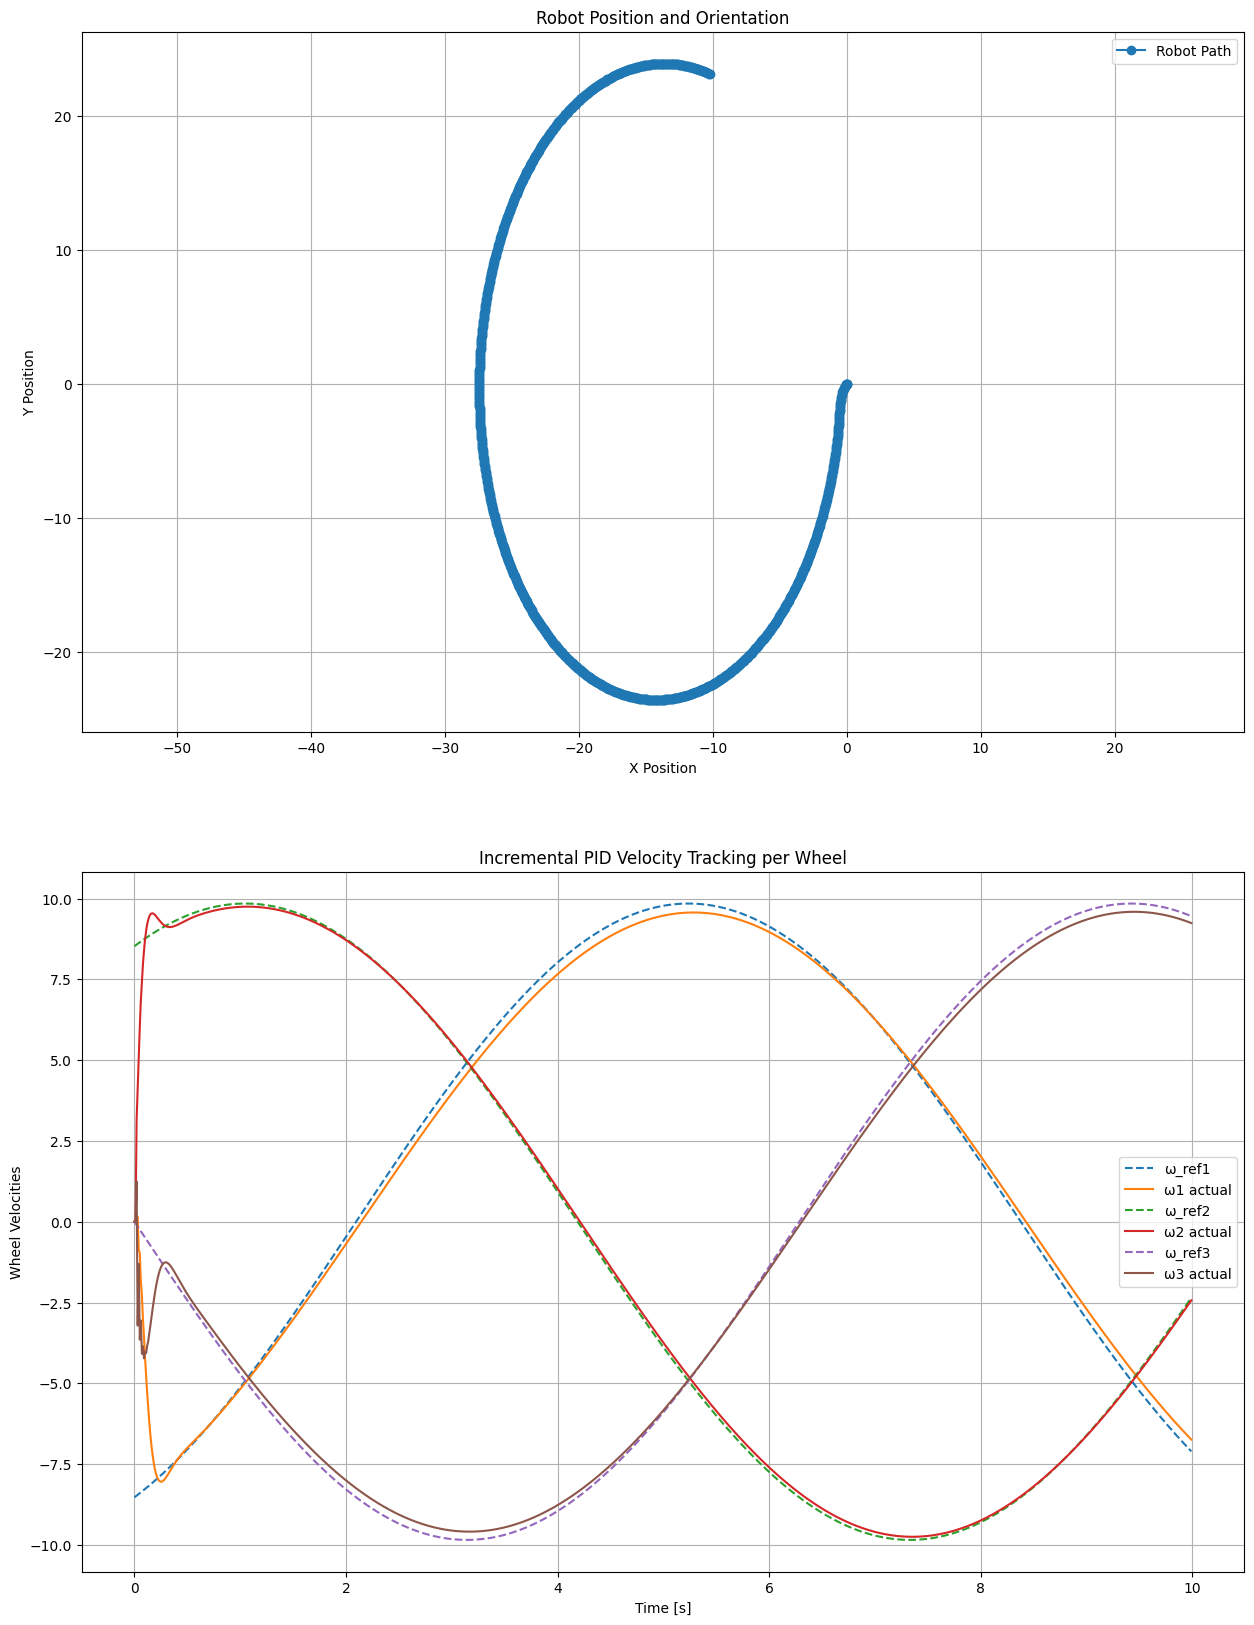

In [ ]:
# Simulation parameters
Ts = 0.01
time = 10
T = np.arange(0, time, Ts)

# ==========================
# 1) Construct the discrete linear system
# ==========================
Ts = 0.01

# Define the nonlinear system
io_sys = ct.nlsys(
    updfnc_omniwheel, outfnc_omniwheel, inputs=('u1', 'u2', 'u3'),
    outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
    name='omniwheel', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
)

# Find the equilibrium point
X0 = [0, 0, 0, 0, 0, 0]
eqpt = ct.find_eqpt(io_sys, X0, 0)
xeq = eqpt[0]

# Linearize the system at the equilibrium point
lin_omni = ct.linearize(io_sys, xeq, 0)
sys_z = ct.c2d(lin_omni, Ts, method='zoh')  # Convert to discrete-time system
A_z, B_z, C_z, D_z = sys_z.A, sys_z.B, sys_z.C, sys_z.D

sys_lin_z = ct.StateSpace(A_z, B_z, C_z, D_z, Ts)

# Define the initial state in the linearized space
# It must be a vector with as many dimensions as states in A_z
X0 = [0, 0, 0, 0, 0, 0]

# PID parameters for each wheel
# [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.03, 0.02, 0.03]
Kp = np.array([21.1, 20.4, 21.1])
Ki = np.array([21, 21, 21])
Kd = np.array([0, 0, 0])

# Desired angular velocity for each wheel (could come from a trajectory generator)
# omega_ref = np.zeros((len(T), 3))
# omega_ref[:, 0] = 5 * (np.mod(T, 2) < 1).astype(float)  # Example square pulse
# omega_ref[:, 1] = 10 * (np.mod(T, 2) < 1).astype(float)
# omega_ref[:, 2] = -20 * (np.mod(T, 2) < 1).astype(float)

# omega_ref, T = generate_omega_ref_trajectory(
#     mov_tuples_list=[
#         (True, 2, 0, 2),
#         (True, 2, -90, 2),
#         (False, 2, 0, 2),
#         (False, 2, -90, 2)

#     ], Ts=0.01
# )

omega_ref = []

time = 10
T = np.arange(0, time, Ts)
n_steps = int(time / Ts)
for t_steps in T:
  x_v, y_v = circ_move(True, 1, 360, 2, t_steps)
  omega_vals = [
    lin_to_ang_vel(x_v, y_v, 1),
    lin_to_ang_vel(x_v, y_v, 2),
    lin_to_ang_vel(x_v, y_v, 3)
  ]
  omega_ref.append(omega_vals)
omega_ref = np.array(omega_ref)

# Initialize
U_pid = np.zeros((len(T), 3))
e = np.zeros((len(T), 3))  # Error for each wheel

# Extract system matrices
A, B, C, D = A_z, B_z, C_z, D_z
x = np.zeros((6,))  # initial state
y_log = np.zeros((len(T), 6))
x_log = np.zeros((len(T), 6))

# Initialize data containers before the loop
X_samples = []
Y_samples = []

# Control loop simulation
for k in range(2, len(T)):
    # Measure: get current wheel velocities (dx, dy, dphi can be converted)
    vel_real = x[3:6]

    # Compute error
    e[k] = omega_ref[k] - vel_real

    # Incremental PID law
    dU = (Kp * (e[k] - e[k-1]) +
          Ki * e[k] +
          Kd * (e[k] - 2*e[k-1] + e[k-2]))

    # Update control signal
    U_pid[k] = U_pid[k-1] + dU

    # Apply input to discrete system: x[k+1] = A*x[k] + B*U[k]
    x = A @ x + B @ U_pid[k]
    y = C @ x + D @ U_pid[k]

    # Log data
    x_log[k] = x
    y_log[k] = y

    # ------------------------------------------
    # Collect training sample for this timestep
    # ------------------------------------------
    # Input features: [s[k], r[k], e[k], e[k-1], e[k-2]]
    # Here: s[k] = current measured velocity (can flatten or choose one axis)
    # r[k] = reference velocity
    s_k = vel_real.flatten()
    r_k = omega_ref[k].flatten()
    e_k = e[k].flatten()
    e_k1 = e[k-1].flatten()
    e_k2 = e[k-2].flatten()

    # Flatten all to 1D and concatenate (for multiwheel systems)
    X_k = np.concatenate([s_k, r_k, e_k, e_k1, e_k2])

    # Target output: [Kp, Ki, Kd] (same for all wheels)
    Y_k = np.array([Kp, Ki, Kd])

    X_samples.append(X_k)
    Y_samples.append(Y_k)

# Convert to numpy arrays after loop
X_samples = np.array(X_samples)
Y_samples = np.array(Y_samples)

# -------------------------------
# After loop: reuse U_pid
# -------------------------------
U = U_pid  # shape: (N, num_inputs)

t_out, y_out = ct.input_output_response(sys_lin_z, T, U.T, X0)

x_pos = y_out[0]
y_pos = y_out[1]

x_pos_world = x_pos * np.cos((-1.5*np.pi/6)+np.pi) - y_pos * np.sin((-1.5*np.pi/6)+np.pi)
y_pos_world = x_pos * np.sin((-1.5*np.pi/6)+np.pi) + y_pos * np.cos((-1.5*np.pi/6)+np.pi)

# np.savez(f'/content/drive/MyDrive/pid_autotuning/data/train/run_n16{Ts}{Kp}{Ki}{Kd}_4.npz', X=X_samples, y=Y_samples)
# np.savez(f'/content/drive/MyDrive/pid_autotuning/data/to_predict/run_{Ts}{Kp}{Ki}{Kd}.npz', X=X_samples, y=Y_samples)

fig, axs = plt.subplots(2, 1, figsize=(15, 20))

ax = axs[1]  # Reference to current subplot

# Plot results
ax.plot(T, omega_ref[:,0], '--', label='ω_ref1')
ax.plot(T, y_log[:,3], label='ω1 actual')
ax.plot(T, omega_ref[:,1], '--', label='ω_ref2')
ax.plot(T, y_log[:,4], label='ω2 actual')
ax.plot(T, omega_ref[:,2], '--', label='ω_ref3')
ax.plot(T, y_log[:,5], label='ω3 actual')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Wheel Velocities')
ax.legend()
ax.set_title('Incremental PID Velocity Tracking per Wheel')
ax.grid()

# 4.2) Plot position outputs (trajectory)
ax = axs[0]  # Reference to current subplot
ax.plot(x_pos_world, y_pos_world, marker="o", label="Robot Path")

# Ensure equal axis scaling for better spatial interpretation
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Robot Position and Orientation")
ax.legend()
ax.grid()

### DSE for PID

In [ ]:
# --- Define helper functions ---
def quality_metrics(ref, actual, T, tol=0.05):
    """Compute steady-state error, overshoot, oscillation, and settling time."""
    N = len(ref)
    ref_final = np.mean(ref[int(0.8*N):], axis=0)
    act_final = np.mean(actual[int(0.8*N):], axis=0)

    # --- Steady-state error ---
    setpoint_error = np.mean(np.abs(ref_final - act_final))

    # --- Overshoot ---
    overshoot = np.mean([
        max(0, (np.max(actual[:, i]) - ref_final[i]) / (abs(ref_final[i]) + 1e-6))
        for i in range(ref.shape[1])
    ])

    # --- Oscillation (variance around final value after steady-state) ---
    steady_idx = int(0.8 * N)
    oscillation = np.mean([
        np.var(actual[steady_idx:, i] - ref_final[i])
        for i in range(ref.shape[1])
    ])

    return setpoint_error, overshoot, oscillation


def run_pid_sim(Kp, Ki, Kd, A, B, C, D, T, omega_ref, save_to_file, file_name, directory):
    """Run PID loop simulation for given gains."""
    x = np.zeros((A.shape[0],))
    U_pid = np.zeros((len(T), 3))
    e = np.zeros((len(T), 3))
    x_log = np.zeros((len(T), 6))
    y_log = np.zeros((len(T), 6))

    # Initialize data containers before the loop
    X_samples = []
    Y_samples = []

    for k in range(2, len(T)):
        vel_real = x[3:6]
        e[k] = omega_ref[k] - vel_real
        dU = (Kp * (e[k] - e[k-1]) +
              Ki * e[k] +
              Kd * (e[k] - 2*e[k-1] + e[k-2]))
        U_pid[k] = U_pid[k-1] + dU
        x = A @ x + B @ U_pid[k]
        y = C @ x + D @ U_pid[k]
        x_log[k] = x
        y_log[k] = y

        if save_to_file:
          s_k = vel_real.flatten()
          r_k = omega_ref[k].flatten()
          e_k = e[k].flatten()
          e_k1 = e[k-1].flatten()
          e_k2 = e[k-2].flatten()

          # Flatten all to 1D and concatenate (for multiwheel systems)
          X_k = np.concatenate([s_k, r_k, e_k, e_k1, e_k2])

          # Target output: [Kp, Ki, Kd] (same for all wheels)
          Y_k = np.array([Kp, Ki, Kd])

          X_samples.append(X_k)
          Y_samples.append(Y_k)

    if save_to_file:
      X_samples = np.array(X_samples)
      Y_samples = np.array(Y_samples)
      np.savez(f'{directory}_{file_name}.npz', X=X_samples, y=Y_samples)

    set_err, overshoot, osc = quality_metrics(omega_ref, y_log[:, 3:6], T)
    return set_err, overshoot, osc, y_log, U_pid

In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from itertools import product

# --- Setup system (you already have these defined externally) ---
Ts = 0.01
time = 10
T = np.arange(0, time, Ts)

# Assume you already have the following from your setup:
# sys_lin_z, A_z, B_z, C_z, D_z, X0, generate_omega_ref_trajectory, lin_move, lin_to_ang_vel

omega_ref, T = generate_omega_ref_trajectory(
    mov_tuples_list=[
        (True, 1, 0, 2),
        (True, 1, -90, 2),
        (False, 1, 0, 2),
        (False, 1, -90, 2)
    ], Ts=Ts
)

A, B, C, D = A_z, B_z, C_z, D_z

# --- Parameter grids ---
# 20   17  0.03   19   16  0.02   20   17  0.03
Kp_vals1 = np.arange(19.5, 21.5, 0.5)
Ki_vals1 = np.arange(16.0, 18.5, 0.5)
Kd_vals1 = np.arange(0.02, 0.04, 0.01)

Kp_vals2 = Kp_vals1
Ki_vals2 = Ki_vals1
Kd_vals2 = Kd_vals1

Kp_vals3 = Kp_vals1
Ki_vals3 = Ki_vals1
Kd_vals3 = Kd_vals1

results = []


Streaming output truncated to the last 5000 lines.
Kp1=21.0, Ki1=17.5, Kd1=0.02 | Kp2=21.0, Ki2=17.0, Kd2=0.03 | Kp3=20.0, Ki3=17.0, Kd3=0.03 | Err=0.002, Ov=1.266, Osc=0.0001
Kp1=21.0, Ki1=17.5, Kd1=0.02 | Kp2=21.0, Ki2=17.0, Kd2=0.03 | Kp3=20.0, Ki3=17.5, Kd3=0.02 | Err=0.002, Ov=1.261, Osc=0.0001
Kp1=21.0, Ki1=17.5, Kd1=0.02 | Kp2=21.0, Ki2=17.0, Kd2=0.03 | Kp3=20.0, Ki3=17.5, Kd3=0.03 | Err=0.002, Ov=1.261, Osc=0.0001
Kp1=21.0, Ki1=17.5, Kd1=0.02 | Kp2=21.0, Ki2=17.0, Kd2=0.03 | Kp3=20.0, Ki3=18.0, Kd3=0.02 | Err=0.002, Ov=1.256, Osc=0.0001
Kp1=21.0, Ki1=17.5, Kd1=0.02 | Kp2=21.0, Ki2=17.0, Kd2=0.03 | Kp3=20.0, Ki3=18.0, Kd3=0.03 | Err=0.002, Ov=1.256, Osc=0.0001
Kp1=21.0, Ki1=17.5, Kd1=0.02 | Kp2=21.0, Ki2=17.0, Kd2=0.03 | Kp3=20.5, Ki3=16.0, Kd3=0.02 | Err=0.002, Ov=1.273, Osc=0.0001
Kp1=21.0, Ki1=17.5, Kd1=0.02 | Kp2=21.0, Ki2=17.0, Kd2=0.03 | Kp3=20.5, Ki3=16.0, Kd3=0.03 | Err=0.002, Ov=1.273, Osc=0.0001
Kp1=21.0, Ki1=17.5, Kd1=0.02 | Kp2=21.0, Ki2=17.0, Kd2=0.03 | Kp3=20.5, Ki

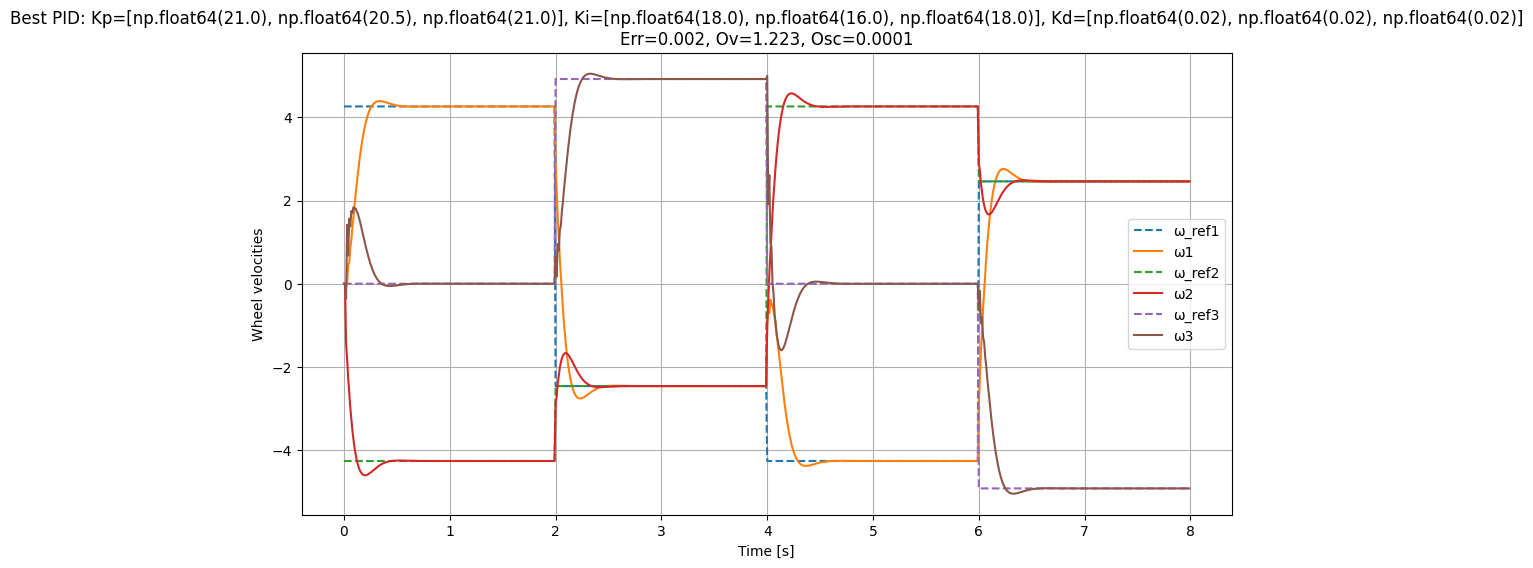

In [ ]:
# --- Grid search ---
for Kp_val1, Ki_val1, Kd_val1 in product(Kp_vals1, Ki_vals1, Kd_vals1):
  for Kp_val2, Ki_val2, Kd_val2 in product(Kp_vals2, Ki_vals2, Kd_vals2):
    for Kp_val3, Ki_val3, Kd_val3 in product(Kp_vals3, Ki_vals3, Kd_vals3):
        Kp = np.array([Kp_val1, Kp_val2, Kp_val3])
        Ki = np.array([Ki_val1, Ki_val2, Ki_val3])
        Kd = np.array([Kd_val1, Kd_val2, Kd_val3])

        set_err, overshoot, osc, y_log, U_pid = run_pid_sim(Kp, Ki, Kd, A, B, C, D, T, omega_ref)

        results.append({
            'Kp1': Kp_val1, 'Ki1': Ki_val1, 'Kd1': Kd_val1,
            'Kp2': Kp_val2, 'Ki2': Ki_val2, 'Kd2': Kd_val2,
            'Kp3': Kp_val3, 'Ki3': Ki_val3, 'Kd3': Kd_val3,
            'SetErr': set_err,
            'Overshoot': overshoot,
            'Oscillation': osc
        })

        print(f"Kp1={Kp_val1:.1f}, Ki1={Ki_val1:.1f}, Kd1={Kd_val1:.2f} | "
              f"Kp2={Kp_val2:.1f}, Ki2={Ki_val2:.1f}, Kd2={Kd_val2:.2f} | "
              f"Kp3={Kp_val3:.1f}, Ki3={Ki_val3:.1f}, Kd3={Kd_val3:.2f} | "

              f"Err={set_err:.3f}, Ov={overshoot:.3f}, Osc={osc:.4f}")

# --- Convert results to array for analysis ---
import pandas as pd
df = pd.DataFrame(results)

# Sort by lowest steady-state error, then overshoot
df['score'] = df['SetErr']*3 + df['Overshoot']*2 + df['Oscillation']*0.5
df_sorted = df.sort_values(by='score')

print("\n=== Top 5 PID configurations ===")
print(df_sorted.head())

# --- Optional: visualize top result ---
best = df_sorted.iloc[0]
Kp = np.array([best.Kp1, best.Kp2, best.Kp3])
Ki = np.array([best.Ki1, best.Ki2, best.Ki3])
Kd = np.array([best.Kd1, best.Kd2, best.Kd3])


_, _, _, y_log, _ = run_pid_sim(Kp, Ki, Kd, A, B, C, D, T, omega_ref)

plt.figure(figsize=(12,6))
plt.plot(T, omega_ref[:,0], '--', label='ω_ref1')
plt.plot(T, y_log[:,3], label='ω1')
plt.plot(T, omega_ref[:,1], '--', label='ω_ref2')
plt.plot(T, y_log[:,4], label='ω2')
plt.plot(T, omega_ref[:,2], '--', label='ω_ref3')
plt.plot(T, y_log[:,5], label='ω3')
plt.legend()
plt.grid()
plt.title(f"Best PID: Kp={[best.Kp1, best.Kp2, best.Kp3]}, Ki={[best.Ki1, best.Ki2, best.Ki3]}, Kd={[best.Kd1, best.Kd2, best.Kd3]}\n"
          f"Err={best.SetErr:.3f}, Ov={best.Overshoot:.3f}, Osc={best.Oscillation:.4f}")
plt.xlabel("Time [s]")
plt.ylabel("Wheel velocities")
plt.show()

### Results

=== Top 5 PID configurations ===

    Kp1   Ki1   Kd1   Kp2   Ki2   Kd2   Kp3   Ki3   Kd3    SetErr     Overshoot    Oscillation    score  
    21.0  18.0  0.02  20.5  16.0  0.02  21.0  18.0  0.02   0.001899   1.223423     0.000095       2.452590
    21.0  18.0  0.02  20.5  16.0  0.02  21.0  18.0  0.03   0.001899   1.223423     0.000095       2.452590
    21.0  18.0  0.02  20.5  16.0  0.03  21.0  18.0  0.02   0.001899   1.223423     0.000095       2.452591
    21.0  18.0  0.02  20.5  16.0  0.03  21.0  18.0  0.03   0.001899   1.223424     0.000095       2.452592
    21.0  18.0  0.03  20.5  16.0  0.02  21.0  18.0  0.02   0.001899   1.223425     0.000095       2.452594

  
  
  
  
  

### DSE Constants + PID

In [ ]:
import numpy as np

# ---- Generate 4 independent sets ----
random_param_sets = [generate_random_motor_params() for _ in range(4)]

print("Generated parameter sets:\n")
for i, p in enumerate(random_param_sets):
    print(f"Set #{i+1}: {p}\n")

print("------------------------------------------------------")

all_runs_results = []

for i, motor_params in enumerate(random_param_sets):

    print(f"\n===== Running PID exploration for parameter set #{i+1} =====")

    # Update system model A, B, C, D for this motor param set
    sys_lin = ct.nlsys(
        updfnc_omniwheel, outfnc_omniwheel, params=motor_params,
        inputs=('u1', 'u2', 'u3'),  outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
        name='omniwheel_sys', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
    )

    # Find the equilibrium point
    X0 = [0, 0, 0, 0, 0, 0]
    eqpt = ct.find_eqpt(sys_lin, X0, 0)
    xeq = eqpt[0]

    # Linearize the system at the equilibrium point
    lin_omni = ct.linearize(sys_lin, xeq, 0)
    sys_z = ct.c2d(lin_omni, Ts, method='zoh')  # Convert to discrete-time system
    A_z, B_z, C_z, D_z = sys_z.A, sys_z.B, sys_z.C, sys_z.D

    sys_lin_z = ct.StateSpace(A_z, B_z, C_z, D_z, Ts)

    # --- Parameter grids ---
    Kp_vals1 = np.arange(20.9, 21.1, 0.1)
    Ki_vals1 = np.arange(17.9, 18.1, 0.1)
    Kd_vals1 = np.arange(0.02, 0.04, 0.01)

    Kp_vals2 = np.arange(20.4, 21.6, 0.1)
    Ki_vals2 = np.arange(15.9, 16.1, 0.1)
    Kd_vals2 = Kd_vals1

    Kp_vals3 = Kp_vals1
    Ki_vals3 = Ki_vals1
    Kd_vals3 = Kd_vals1

    # Now reuse your PID grid-search exactly as before:
    results = []
    i = 0

    for Kp_val1, Ki_val1, Kd_val1 in product(Kp_vals1, Ki_vals1, Kd_vals1):
        for Kp_val2, Ki_val2, Kd_val2 in product(Kp_vals2, Ki_vals2, Kd_vals2):
            for Kp_val3, Ki_val3, Kd_val3 in product(Kp_vals3, Ki_vals3, Kd_vals3):

                Kp = np.array([Kp_val1, Kp_val2, Kp_val3])
                Ki = np.array([Ki_val1, Ki_val2, Ki_val3])
                Kd = np.array([Kd_val1, Kd_val2, Kd_val3])

                set_err, overshoot, osc, y_log, U_pid = \
                    run_pid_sim(Kp, Ki, Kd, A_z, B_z, C_z, D_z, T, omega_ref)

                results.append({
                    "iteration": i + 1,
                    "Kp": Kp, "Ki": Ki, "Kd": Kd,
                    "SetErr": set_err, "Overshoot": overshoot, "Oscillation": osc
                })

                if i == 100:
                  print(f"Kp1={Kp_val1:.1f}, Ki1={Ki_val1:.1f}, Kd1={Kd_val1:.2f} | "
                        f"Kp2={Kp_val2:.1f}, Ki2={Ki_val2:.1f}, Kd2={Kd_val2:.2f} | "
                        f"Kp3={Kp_val3:.1f}, Ki3={Ki_val3:.1f}, Kd3={Kd_val3:.2f} | "

                        f"Err={set_err:.3f}, Ov={overshoot:.3f}, Osc={osc:.4f}")
                  i = -1
                i+=1

    all_runs_results.append(results)

Generated parameter sets:

Set #1: {'K_1': np.float64(0.26751832593837627), 'K_2': np.float64(0.2553528282176232), 'K_3': np.float64(0.25603446873256014), 'Ra_1': np.float64(1.3500169423077495), 'Ra_2': np.float64(1.2533711208431086), 'Ra_3': np.float64(1.3076582165589343)}

Set #2: {'K_1': np.float64(0.2521738590330228), 'K_2': np.float64(0.2631345911285612), 'K_3': np.float64(0.24628602849810877), 'Ra_1': np.float64(1.3030909617669044), 'Ra_2': np.float64(1.2913666003873396), 'Ra_3': np.float64(1.3369562791235876)}

Set #3: {'K_1': np.float64(0.25200495381718013), 'K_2': np.float64(0.2532819491577218), 'K_3': np.float64(0.2505221491389123), 'Ra_1': np.float64(1.2954823201305459), 'Ra_2': np.float64(1.2764347509685303), 'Ra_3': np.float64(1.2963846706134854)}

Set #4: {'K_1': np.float64(0.2699481156713708), 'K_2': np.float64(0.2631258138315323), 'K_3': np.float64(0.2605770694363055), 'Ra_1': np.float64(1.3475739112313263), 'Ra_2': np.float64(1.3536147242620742), 'Ra_3': np.float64(1.3

In [ ]:
import pandas as pd
flat_results = [item for sublist in all_runs_results for item in sublist]
df = pd.DataFrame(flat_results)

# Sort by lowest steady-state error, then overshoot
df['score'] = df['SetErr']*3 + df['Overshoot']*2 + df['Oscillation']*0.5
df_sorted = df.sort_values(by='score')

print("\n=== Top 5 PID configurations ===")
print(df_sorted.head())


=== Top 5 PID configurations ===
       iteration                  Kp                  Ki                  Kd  \
49157         50  [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.03, 0.02, 0.03]   
47753         60  [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.02, 0.02, 0.03]   
49156         49  [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.03, 0.02, 0.02]   
47752         59  [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.02, 0.02, 0.02]   
49175         68  [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.03, 0.03, 0.03]   

         SetErr  Overshoot  Oscillation     score  
49157  0.002212   1.220083     0.000143  2.446872  
47753  0.002212   1.220111     0.000143  2.446928  
49156  0.002212   1.220155     0.000143  2.447018  
47752  0.002212   1.220184     0.000143  2.447074  
49175  0.002212   1.220198     0.000143  2.447102  


### Results

=== Top 5 PID configurations ===

    Kp                  Ki                  Kd                   SetErr     Overshoot    Oscillation     score  
    [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.03, 0.02, 0.03]   0.002212   1.220083     0.000143        2.446872
    [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.02, 0.02, 0.03]   0.002212   1.220111     0.000143        2.446928
    [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.03, 0.02, 0.02]   0.002212   1.220155     0.000143        2.447018
    [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.02, 0.02, 0.02]   0.002212   1.220184     0.000143        2.447074
    [21.1, 20.4, 21.1]  [18.1, 15.9, 18.1]  [0.03, 0.03, 0.03]   0.002212   1.220198     0.000143        2.447102
  
  
  
  

## Random Robot Generator

In [ ]:
# ---- Generate 20 independent sets ----
random_param_sets = [generate_random_motor_params() for _ in range(20)]

print("----------- Generated parameter sets: ----------------\n")
for i, p in enumerate(random_param_sets):
    print(f"Set #{i+1}: {p}\n")
print("------------------------------------------------------")


# ---- Define trajectories ----------
mov_touples_list_list = [
    [
        (True, 1, 0, 3),
        (True, 1, -135, 5),
        (False, 1, -90, 4)
    ],
    [
        (True, 2, 0, 4),
        (True, 2, -90, 4),
        (False, 2, 0, 4),
        (False, 2, -90, 4)

    ]

]

Ts = 0.01
for i, motor_params in enumerate(random_param_sets):

    print(f"\n===== Running robot set #{i+1} =====")

    # Update system model A, B, C, D for this motor param set
    sys_lin = ct.nlsys(
        updfnc_omniwheel, outfnc_omniwheel, params=motor_params,
        inputs=('u1', 'u2', 'u3'),  outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
        name='omniwheel_sys', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
    )

    Kp = np.array([21.1, 20.4, 21.1])
    Ki = np.array([18.1, 15.9, 18.1])
    Kd = np.array([0.03, 0.02, 0.03])

    # Find the equilibrium point
    X0 = [0, 0, 0, 0, 0, 0]
    eqpt = ct.find_eqpt(sys_lin, X0, 0)
    xeq = eqpt[0]

    # Linearize the system at the equilibrium point
    lin_omni = ct.linearize(sys_lin, xeq, 0)
    sys_z = ct.c2d(lin_omni, Ts, method='zoh')  # Convert to discrete-time system
    A_z, B_z, C_z, D_z = sys_z.A, sys_z.B, sys_z.C, sys_z.D

    sys_lin_z = ct.StateSpace(A_z, B_z, C_z, D_z, Ts)

    for mov_tuples_list in mov_touples_list_list:
        omega_ref, T = generate_omega_ref_trajectory(
            mov_tuples_list=mov_tuples_list,
            Ts = Ts
        )

        run_pid_sim(Kp, Ki, Kd, A_z, B_z, C_z, D_z, T, omega_ref,
                    save_to_file=True, file_name=f"Robot{i+1}",
                    directory="/content/drive/MyDrive/pid_autotuning/data/robots_train/")

----------- Generated parameter sets: ----------------

Set #1: {'K_1': np.float64(0.2671993513292775), 'K_2': np.float64(0.2607943416678973), 'K_3': np.float64(0.258857146522799), 'Ra_1': np.float64(1.300432738931682), 'Ra_2': np.float64(1.3499120763472758), 'Ra_3': np.float64(1.3422981850755067)}

Set #2: {'K_1': np.float64(0.2707663760581677), 'K_2': np.float64(0.2589760761296131), 'K_3': np.float64(0.2693443098217206), 'Ra_1': np.float64(1.3106356624637954), 'Ra_2': np.float64(1.2881259074344624), 'Ra_3': np.float64(1.2584327905590742)}

Set #3: {'K_1': np.float64(0.2614481683361666), 'K_2': np.float64(0.2644738106813955), 'K_3': np.float64(0.2588013054481168), 'Ra_1': np.float64(1.3335541607048156), 'Ra_2': np.float64(1.3000076471452762), 'Ra_3': np.float64(1.2688789984234112)}

Set #4: {'K_1': np.float64(0.249538102431478), 'K_2': np.float64(0.27041396302830606), 'K_3': np.float64(0.2626159868077899), 'Ra_1': np.float64(1.3692145177738042), 'Ra_2': np.float64(1.312694952900237), 

## Tuning with AI Model

('linear', True, 2, 0, 0, 4)
('linear', True, 1, -90, 0, 6)
('linear', False, 3, 0, 0, 5)
('circular', True, 5, 360, 10, 12.566370614359172)
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
##############################################
Final Kp: [17.17976  16.612692 17.076273]
Final Ki: [14.552249 12.858848 14.501177]
Final Kd: [ 0.13643335 -0.02011428  0.00122866]
##############################################
The code for the AI inference and PID constant update loop has been implemented.
The PID constants are checked and potentially updated every 2.0 seconds.
The data collection buffers (X_samples, Y_samples) are reset after each update.
The final plot output is saved to pid_sim_ai_update.png.


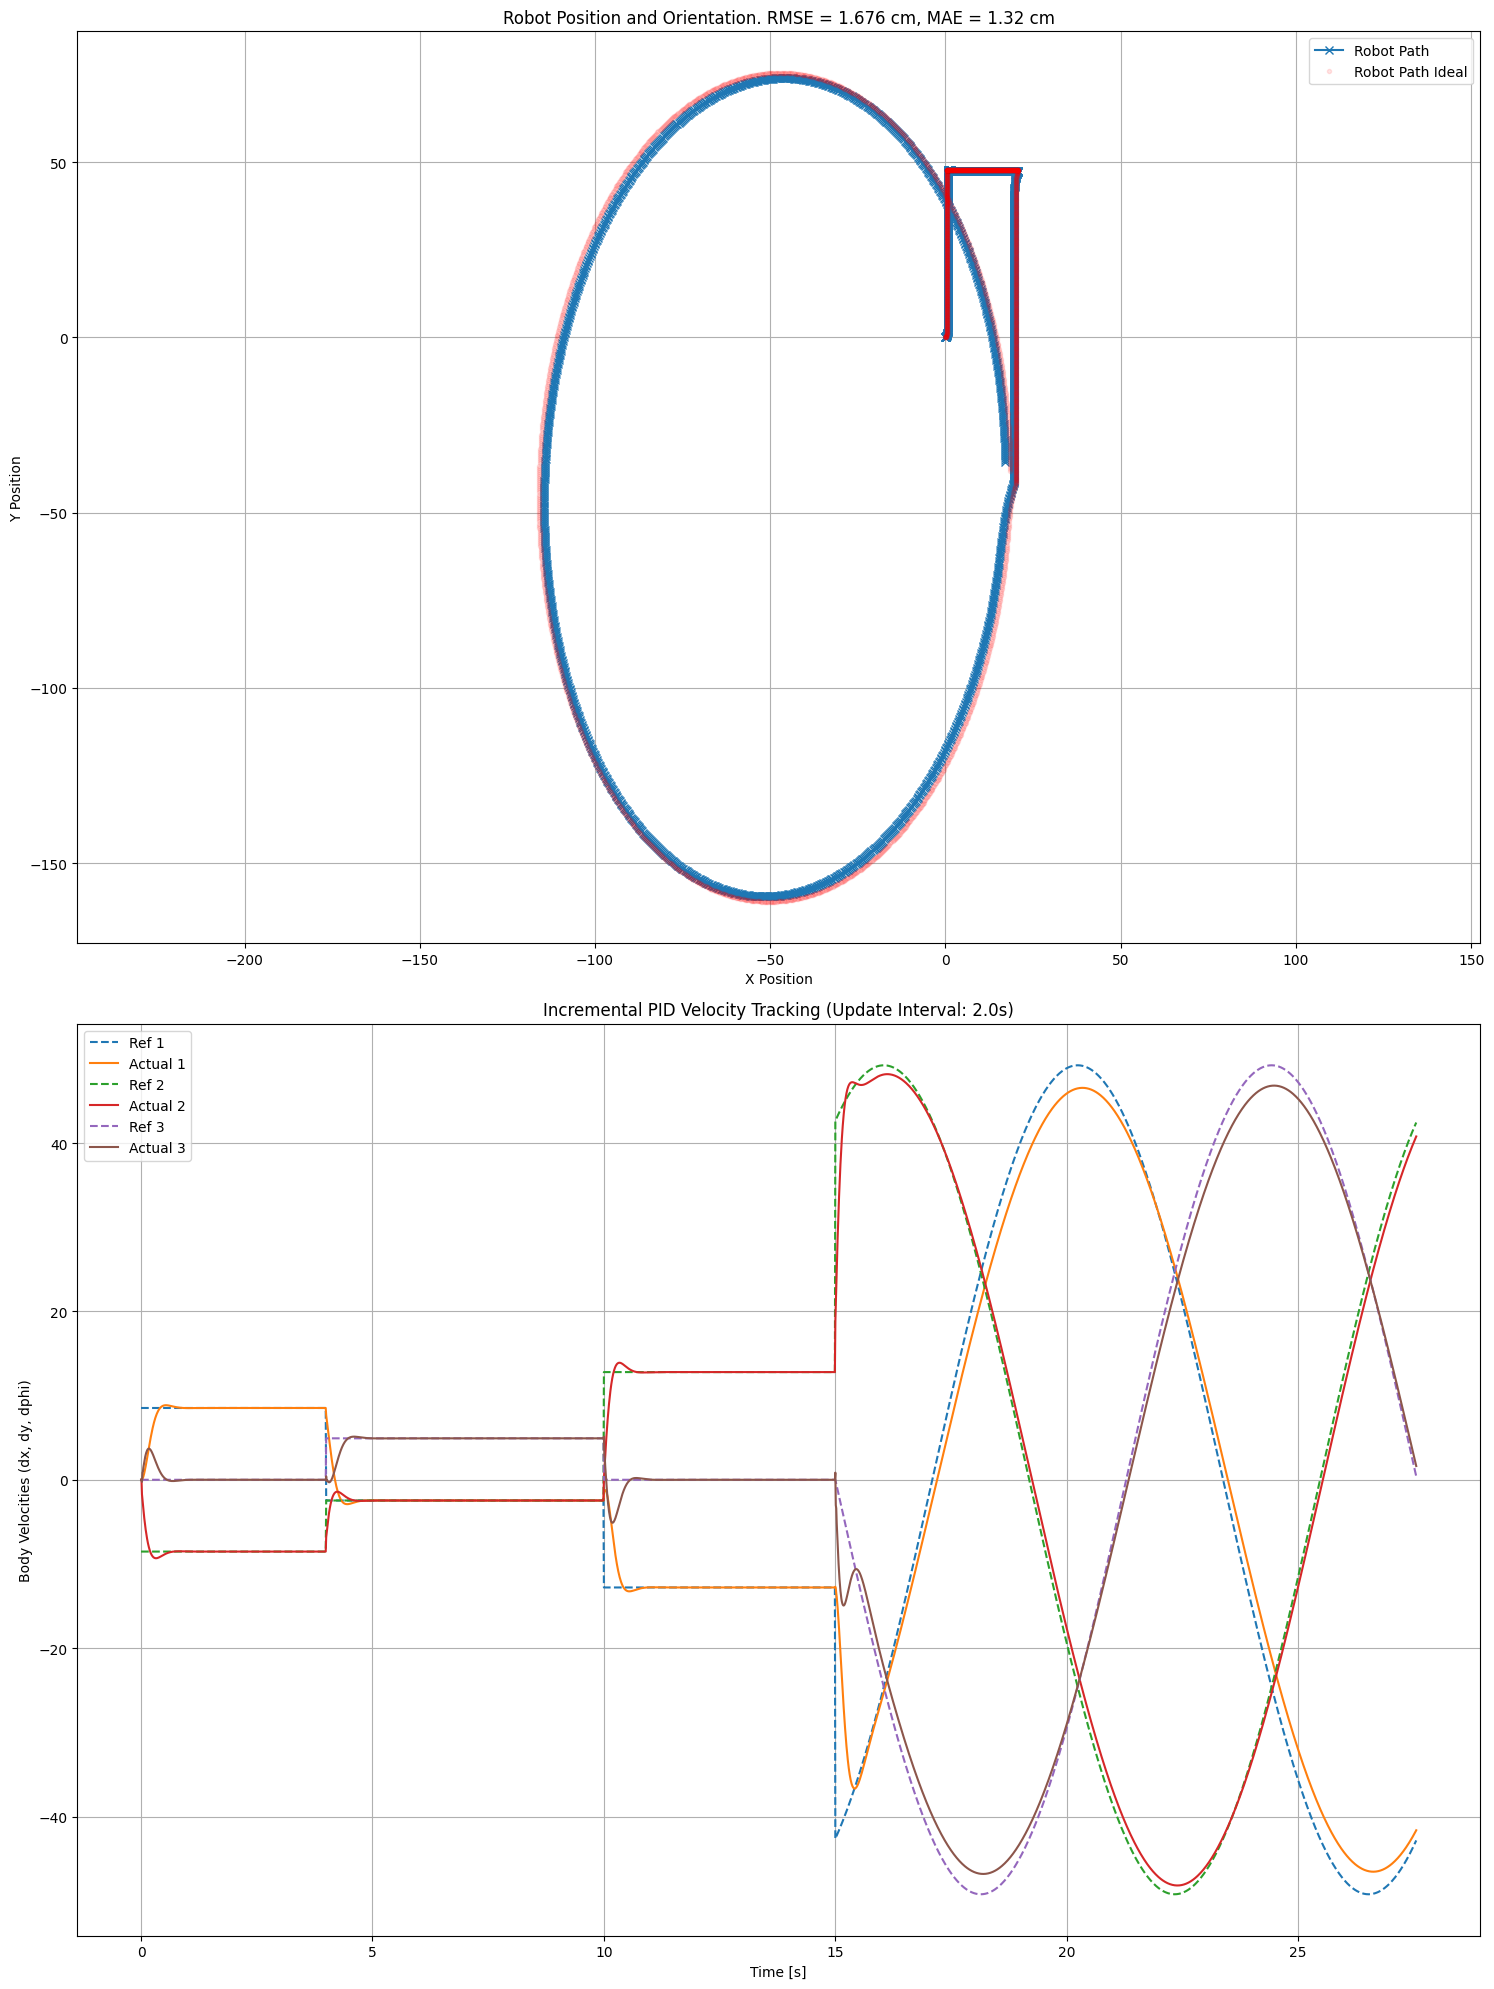

In [ ]:
from math import sqrt, sin, cos, pi
import numpy as np
import control as ct
from control.matlab import *
import matplotlib.pyplot as plt
import keras
from keras import losses

model_name = "3wheel_model_lstm_128_tanh_new"
model_path = f"/content/drive/MyDrive/pid_autotuning/models/{model_name}.h5"

# Pass the built-in mean_squared_error function under the expected name 'mse'
custom_objects = {
    'mse': losses.mean_squared_error
}

model = keras.models.load_model(
    model_path,
    custom_objects=custom_objects
)

def build_sequences(X, seq_len=20):
    X_seq = []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
    return np.array(X_seq)

def calculate_path_error_metrics(x_actual, y_actual, x_ideal, y_ideal):
    """
    Calculates the instantaneous position error, RMSE, and MAE
    for the robot's global path tracking.
    """
    # 1. Calculate the error in X and Y components at each step
    error_x = x_ideal - x_actual
    error_y = y_ideal - y_actual

    # 2. Calculate the Instantaneous Position Error (Euclidean Distance)
    # This is the distance between the actual (x_actual, y_actual) and ideal (x_ideal, y_ideal)
    e_pos = np.sqrt(error_x**2 + error_y**2)

    # 3. Calculate Root Mean Square Error (RMSE)
    # The magnitude of the instantaneous error vector is squared, averaged, then rooted.
    rmse = np.sqrt(np.mean(e_pos**2))

    # 4. Calculate Mean Absolute Error (MAE)
    # The average of the instantaneous errors.
    mae = np.mean(e_pos)

    return rmse, mae

# --- AI Model Placeholder Function ---
def predict_pid_constants(X_samples, current_Kp, current_Ki, current_Kd, k, Ts):
    """
    Placeholder for AI model inference. In a real application, this would:
    1. Aggregate or process X_samples (state, reference, error data) collected.
    2. Load the trained AI model.
    3. Run model.predict() to get new Kp, Ki, Kd values.

    For demonstration, we check the current time 'T[k]' and update Kp1 at t=5.0s.
    """
    UPDATE_INTERVAL_S = 2.0
    T_current = k * Ts

    # Check if we are at an update time and have collected samples
    if np.isclose(T_current % UPDATE_INTERVAL_S, 0) and T_current > 0 and len(X_samples) > 0:

        X_all = []
        X_seq = build_sequences(X_samples, 20)
        X_all.append(X_seq)
        X_all = np.concatenate(X_all, axis=0)

        # --- PLACEHOLDER LOGIC: Adjust Kp for wheel 1 ---
        y_pred = model.predict(X_all, verbose=1)
        mean_gains = np.mean(y_pred, axis=0)

        Kp_new = np.array([mean_gains[0], mean_gains[1], mean_gains[2]])
        Ki_new = np.array([mean_gains[3], mean_gains[4], mean_gains[5]])
        Kd_new = np.array([mean_gains[6], mean_gains[7], mean_gains[8]])

        # print(f'Kp = np.array([{mean_gains[0]}, {mean_gains[1]}, {mean_gains[2]}])')
        # print(f'Ki = np.array([{mean_gains[3]}, {mean_gains[4]}, {mean_gains[5]}])')
        # print(f'Kd = np.array([{mean_gains[6]}, {mean_gains[7]}, {mean_gains[8]}])')

        # print(f"\n--- PID CONSTANTS UPDATED at t={T_current}s ---")
        # print(f"Kp before: {current_Kp}, Kp after: {Kp_new}")
        # print("-----------------------------------------\n")

        return Kp_new, Ki_new, Kd_new

    # Otherwise, return the current constants
    return current_Kp.copy(), current_Ki.copy(), current_Kd.copy()

# Simulation parameters
Ts = 0.01
time = 12 # Extended time to show multiple updates
T = np.arange(0, time, Ts)

# Define the nonlinear system
io_sys = ct.nlsys(
    updfnc_omniwheel, outfnc_omniwheel, inputs=('u1', 'u2', 'u3'),
    outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
    name='omniwheel', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
)

# Find the equilibrium point
X0 = [0, 0, 0, 0, 0, 0]
eqpt = ct.find_eqpt(io_sys, X0, 0)
xeq = eqpt[0]

# Linearize the system at the equilibrium point
lin_omni = ct.linearize(io_sys, xeq, 0)
sys_z = ct.c2d(lin_omni, Ts, method='zoh')  # Convert to discrete-time system
A_z, B_z, C_z, D_z = sys_z.A, sys_z.B, sys_z.C, sys_z.D

sys_lin_z = ct.StateSpace(A_z, B_z, C_z, D_z, Ts)

# Initial PID parameters
Kp = np.array([13.074613, 12.121785, 12.510017])
Ki = np.array([10.834111,  9.564942, 10.935776])
Kd = np.array([0.1919426,  0.01672415, 0.12179589])

# Ideal PID parameters
Kp_ideal = np.array([21.1, 20.4, 21.1])
Ki_ideal = np.array([18.1, 15.9, 18.1])
Kd_ideal = np.array([0.03, 0.02, 0.03])

# Desired trajectory generation (Modified time to match simulation time)
omega_ref, T_actual = generate_omega_ref_trajectory(
    mov_tuples_list=[
        ('linear', True, 2, 0, 0, 4),
        ('linear', True, 1, -90, 0, 6),
        ('linear', False, 3, 0, 0, 5),
        ('circular', True, 5, 360, 10, (360/360) * 2 * pi * 10 / 5)
    ], Ts=0.01
)
T = np.arange(0, len(omega_ref) * Ts, Ts) # Adjust T length

# Initialize
U_pid = np.zeros((len(T), 3))
U_pid_ideal = np.zeros((len(T), 3))
e = np.zeros((len(T), 3))
e_ideal = np.zeros((len(T), 3))

x = np.zeros((6,))
x_ideal = np.zeros((6,))

# Initialize logs
y_log = np.zeros((len(T), 6))
x_log = np.zeros((len(T), 6))
y_log_ideal = np.zeros((len(T), 6))
x_log_ideal = np.zeros((len(T), 6))

# Initialize data containers for AI training/inference for the current interval
X_samples = []
Y_samples = []

# --- AI INFERENCE PARAMETERS ---
UPDATE_INTERVAL_S = 2.0
UPDATE_INTERVAL_STEPS = int(UPDATE_INTERVAL_S / Ts)
# -------------------------------

# Control loop simulation
for k in range(2, len(T)):
    # ------------------------------------------
    # 1. AI INFERENCE AND UPDATE LOGIC
    # ------------------------------------------
    # Check if the current time step aligns with an update interval
    # if k % UPDATE_INTERVAL_STEPS == 0:

    #     # Pass collected data and current constants to the prediction model
    #     Kp_new, Ki_new, Kd_new = predict_pid_constants(X_samples, Kp, Ki, Kd, k, Ts)

    #     # Update the constants for the remaining part of the trajectory
    #     print(f"Kp before: {Kp}, Kp after: {Kp_new}")
    #     print(f"Ki before: {Ki}, Ki after: {Ki_new}")
    #     print(f"Kd before: {Kd}, Kd after: {Kd_new}")
    #     Kp = Kp_new
    #     Ki = Ki_new
    #     Kd = Kd_new

    #     # Reset data buffers for the next interval
    #     X_samples = []

    # ------------------------------------------
    # 2. PID CONTROL LOOP
    # ------------------------------------------

    # Measure: get current body velocities (dx, dy, dphi)
    vel_body = x[3:6]
    vel_body_ideal = x_ideal[3:6]

    # Compute error (use modulo or clip for ref_idx if T length is different from omega_ref length)
    ref_idx = min(k, len(omega_ref) - 1)
    e[k] = omega_ref[ref_idx] - vel_body
    e_ideal[k] = omega_ref[ref_idx] - vel_body_ideal

    # Incremental PID law (uses the CURRENTLY active Kp, Ki, Kd)
    dU = (Kp * (e[k] - e[k-1]) +
          Ki * e[k] +
          Kd * (e[k] - 2*e[k-1] + e[k-2]))
    dU_ideal = (Kp_ideal * (e_ideal[k] - e_ideal[k-1]) +
                Ki_ideal * e_ideal[k] +
                Kd_ideal * (e_ideal[k] - 2*e_ideal[k-1] + e_ideal[k-2]))

    # Update control signal and apply to discrete system
    U_pid[k] = U_pid[k-1] + dU
    U_pid_ideal[k] = U_pid_ideal[k-1] + dU_ideal
    x = A_z @ x + B_z @ U_pid[k]
    y = C_z @ x + D_z @ U_pid[k]
    x_ideal = A_z @ x_ideal + B_z @ U_pid_ideal[k]
    y_ideal = C_z @ x_ideal + D_z @ U_pid_ideal[k]

    # Log data
    x_log[k] = x
    y_log[k] = y
    x_log_ideal[k] = x_ideal
    y_log_ideal[k] = y_ideal

    # ------------------------------------------
    # 3. Collect training sample (uses CURRENTLY active constants)
    # ------------------------------------------
    s_k = vel_body.flatten()
    r_k = omega_ref[ref_idx].flatten()
    e_k = e[k].flatten()
    e_k1 = e[k-1].flatten()
    e_k2 = e[k-2].flatten()

    X_k = np.concatenate([s_k, r_k, e_k, e_k1, e_k2])

    X_samples.append(X_k)

# Convert to numpy arrays after loop
X_samples_final = np.array(X_samples)
Y_samples_final = np.array(Y_samples)

Kp_new, Ki_new, Kd_new = predict_pid_constants(X_samples, Kp, Ki, Kd, 200, Ts)
print("##############################################")
print(f"Final Kp: {Kp_new}")
print(f"Final Ki: {Ki_new}")
print(f"Final Kd: {Kd_new}")
print("##############################################")

# -------------------------------
# After loop: Simulation plotting
# -------------------------------
U = U_pid
U_ideal = U_pid_ideal

t_out, y_out = ct.input_output_response(sys_lin_z, T, U.T, X0)
t_out_ideal, y_out_ideal = ct.input_output_response(sys_lin_z, T, U_ideal.T, X0)

x_pos = y_out[0]
y_pos = y_out[1]

x_pos_ideal = y_out_ideal[0]
y_pos_ideal = y_out_ideal[1]

# World coordinate transformation
rot_angle = (-1.5*np.pi/6)+np.pi
x_pos_world = x_pos * np.cos(rot_angle) - y_pos * np.sin(rot_angle)
y_pos_world = x_pos * np.sin(rot_angle) + y_pos * np.cos(rot_angle)

x_pos_world_ideal = x_pos_ideal * np.cos(rot_angle) - y_pos_ideal * np.sin(rot_angle)
y_pos_world_ideal = x_pos_ideal * np.sin(rot_angle) + y_pos_ideal * np.cos(rot_angle)

fig, axs = plt.subplots(2, 1, figsize=(15, 20))

ax = axs[1]
ax.plot(T, omega_ref[:,0], '--', label='Ref 1')
ax.plot(T, y_log[:len(T),3], label='Actual 1')
ax.plot(T, omega_ref[:,1], '--', label='Ref 2')
ax.plot(T, y_log[:len(T),4], label='Actual 2')
ax.plot(T, omega_ref[:,2], '--', label='Ref 3')
ax.plot(T, y_log[:len(T),5], label='Actual 3')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Body Velocities (dx, dy, dphi)')
ax.legend()
ax.set_title(f'Incremental PID Velocity Tracking (Update Interval: {UPDATE_INTERVAL_S}s)')
ax.grid()

rmse_e, mae_e = calculate_path_error_metrics(x_pos_world, y_pos_world, x_pos_world_ideal, y_pos_world_ideal)

ax = axs[0]
ax.plot(x_pos_world, y_pos_world, marker="x", label="Robot Path")
ax.plot(x_pos_world_ideal, y_pos_world_ideal, "r.", alpha=0.1, label="Robot Path Ideal")
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title(f"Robot Position and Orientation. RMSE = {np.round(rmse_e, 3)} cm, MAE = {np.round(mae_e, 3)} cm")
ax.legend()
ax.grid()

plt.tight_layout()
plt.savefig('pid_sim_ai_update.png')

print("The code for the AI inference and PID constant update loop has been implemented.")
print(f"The PID constants are checked and potentially updated every {UPDATE_INTERVAL_S} seconds.")
print("The data collection buffers (X_samples, Y_samples) are reset after each update.")
print("The final plot output is saved to pid_sim_ai_update.png.")

## **Discrete Simulation**

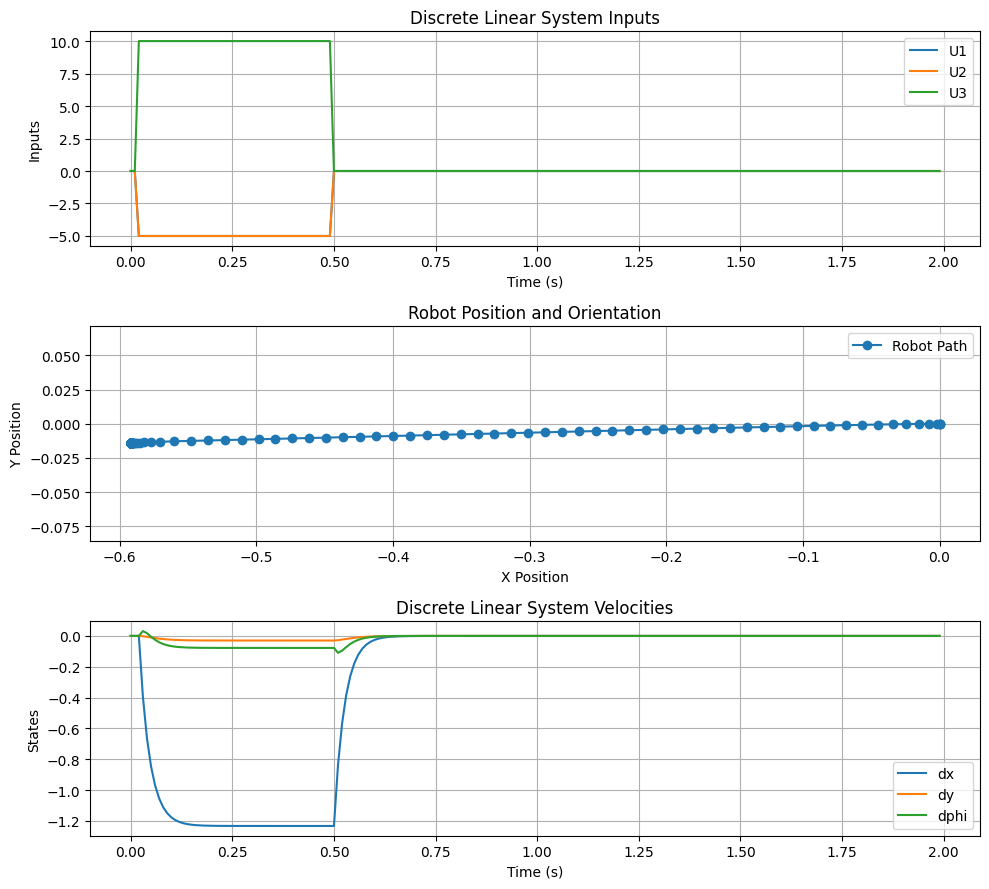

In [ ]:
# Simulation parameters
Ts = 0.01
time = 10
T = np.arange(0, time, Ts)



# ==========================
# 1) Construct the discrete linear system
# ==========================
Ts = 0.01

# Define the nonlinear system
io_sys = ct.nlsys(
    updfnc_omniwheel, outfnc_omniwheel, inputs=('u1', 'u2', 'u3'),
    outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
    name='omniwheel', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
)

# Find the equilibrium point
X0 = [0, 0, 0, 0, 0, 0]
eqpt = ct.find_eqpt(io_sys, X0, 0)
xeq = eqpt[0]

# Linearize the system at the equilibrium point
lin_omni = ct.linearize(io_sys, xeq, 0)
sys_z = ct.c2d(lin_omni, Ts, method='zoh')  # Convert to discrete-time system
A_z, B_z, C_z, D_z = sys_z.A, sys_z.B, sys_z.C, sys_z.D

sys_lin_z = ct.StateSpace(A_z, B_z, C_z, D_z, Ts)

# Define the initial state in the linearized space
# It must be a vector with as many dimensions as states in A_z
X0 = [0, 0, 0, 0, 0, 0]

# ==========================
# 2) Create discrete control inputs (con retardo)
# ==========================
# Definir el tiempo muerto en segundos
dead_time = 0.02 # Ejemplo: 0.02 segundos

# Calcular el número de pasos de retardo (N)
# Ts = 0.01
N_delay = int(np.round(dead_time / Ts)) # N_delay = 2 pasos

# Crear el vector de control U (el deseado)
U_desired = np.zeros((len(T), 3))
pulse_width = 0.5 - dead_time
pulse_period = 2.0

U_desired[:, 0] = -5 * (np.mod(T, pulse_period) < pulse_width).astype(float)
U_desired[:, 1] = -5 * (np.mod(T, pulse_period) < pulse_width).astype(float)
U_desired[:, 2] = 10 * (np.mod(T, pulse_period) < pulse_width).astype(float)

# =========================================================
# Aplicación del Retardo Puro
# =========================================================
# 1. Crear un vector de ceros inicial (la duración del retardo)
zeros_delay = np.zeros((N_delay, 3))

# 2. Obtener la parte de U_desired que se aplicará (todo menos los N_delay últimos)
U_shifted = U_desired[:-N_delay, :]

# 3. Concatenar: [Ceros Iniciales ; U_desired Desplazado]
U_retardo = np.concatenate((zeros_delay, U_shifted), axis=0)

# El vector de entrada real que se usará en la simulación es U_retardo
U = U_retardo # Sobreescribir U con el vector retardado
# =========================================================

# ==========================
# 3) Simulate the discrete linear system
# ==========================
# input_output_response() simulates a StateSpace (or TransferFunction) model with input U
t_out, y_out = ct.input_output_response(sys_lin_z, T, U.T, X0)

# y_out has shape (#outputs, len(T)) => 6 rows if C_z is 6x6
# x_out has shape (#states, len(T)) => 6 rows

# ==========================
# 4) Plot results
# ==========================

fig, axs = plt.subplots(3, 1, figsize=(10, 9))

# 4.1) Plot control inputs
axs[0].plot(T, U[:, 0], label="U1")
axs[0].plot(T, U[:, 1], label="U2")
axs[0].plot(T, U[:, 2], label="U3")
axs[0].legend()
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Inputs")
axs[0].set_title("Discrete Linear System Inputs")
axs[0].grid()

# 4.2) Plot position outputs (trajectory)
ax = axs[1]  # Reference to current subplot
ax.plot(y_out[0], y_out[1], marker="o", label="Robot Path")

# Ensure equal axis scaling for better spatial interpretation
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Robot Position and Orientation")
ax.legend()
ax.grid()

# 4.3) Plot velocity states
axs[2].plot(t_out, y_out[3], label="dx")
axs[2].plot(t_out, y_out[4], label="dy")
axs[2].plot(t_out, y_out[5], label="dphi")
axs[2].legend()
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("States")
axs[2].set_title("Discrete Linear System Velocities")
axs[2].grid()

plt.tight_layout()
plt.show()

## **Continous simulation**

In [ ]:
# Define system
io_sys = ct.nlsys(
    updfnc_omniwheel, outfnc_omniwheel, inputs=('u1', 'u2', 'u3'),
    outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
    name='omniwheel', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
)

# Initial states
X0 = [0, 0, 0, 0, 0, 0]

# Simulation parameters
time = 10  # Total simulation time
dt = 0.001   # Time step
T = np.arange(0, time, dt)  # Time vector

# Define control inputs (3 inputs, initially set to 0)
U = np.zeros((len(T), 3))

# Configure input as a pulse train
pulse_width = 1.0   # Duration of each pulse
pulse_period = 2.0  # Repetition period

# First input: Zero (no action)
U[:, 0] = -5*(np.mod(T, pulse_period) < pulse_width).astype(float)

# Second input: Pulse train
U[:, 1] = 5*(np.mod(T, pulse_period) < pulse_width).astype(float)

# Third input: Inverted pulse train
U[:, 2] = 0*(np.mod(T, pulse_period) < pulse_width).astype(float)

# Simulate the system
t, x = ct.input_output_response(io_sys, T, U.T, X0)

# Extract relevant outputs
dx, dy, dphi = x[3, :], x[4, :], x[5, :]
x_pos = x[0, :] #np.cumsum(dx * dt)
y_pos = x[1, :] #np.cumsum(dy * dt)
phi_angle = x[2, :] #np.cumsum(dphi * dt)

# Create figure
fig, axs = plt.subplots(3, 1, figsize=(10, 9))

# Plot control inputs
axs[0].plot(T, U[:, 0], label="U1 (Control Input 1)")
axs[0].plot(T, U[:, 1], label="U2 (Control Input 2)")
axs[0].plot(T, U[:, 2], label="U3 (Control Input 3)")
axs[0].legend()
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Input Value")
axs[0].set_title("Control Inputs over Time")
axs[0].grid()

# Plot velocities
axs[1].plot(t, dx, label="dx (X velocity)")
axs[1].plot(t, dy, label="dy (Y velocity)")
axs[1].plot(t, dphi, label="dphi (Angular velocity)")
axs[1].legend()
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Velocity")
axs[1].set_title("Robot Velocities over Time")
axs[1].grid()

# Plot robot trajectory
ax = axs[2]  # Reference last subplot
ax.plot(x[0, :], x[1, :], marker="o", label="Robot Path")

# Ensure equal axis scaling
ax.set_aspect('equal', adjustable='datalim')

# # Add orientation arrows
# for i in range(0, len(x_pos), 10):
#     ax.arrow(x_pos[i], y_pos[i], 0.05 * np.cos(phi_angle[i]), 0.05 * np.sin(phi_angle[i]),
#              head_width=0.02, head_length=0.02, fc='red', ec='red')

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Robot Position and Orientation")
ax.legend()
ax.grid()

# Show all plots
plt.tight_layout()
plt.show()



# Common PID Methods

## Obtaining Plant Parameters

<>:103: SyntaxWarning: invalid escape sequence '\o'
<>:104: SyntaxWarning: invalid escape sequence '\o'
<>:105: SyntaxWarning: invalid escape sequence '\o'
<>:103: SyntaxWarning: invalid escape sequence '\o'
<>:104: SyntaxWarning: invalid escape sequence '\o'
<>:105: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3708592394.py:103: SyntaxWarning: invalid escape sequence '\o'
  axs[1].plot(T, omega[0, :], label="$\omega_1$ (Wheel 1 Speed)")
/tmp/ipython-input-3708592394.py:104: SyntaxWarning: invalid escape sequence '\o'
  axs[1].plot(T, omega[1, :], label="$\omega_2$ (Wheel 2 Speed)")
/tmp/ipython-input-3708592394.py:105: SyntaxWarning: invalid escape sequence '\o'
  axs[1].plot(T, omega[2, :], label="$\omega_3$ (Wheel 3 Speed)")


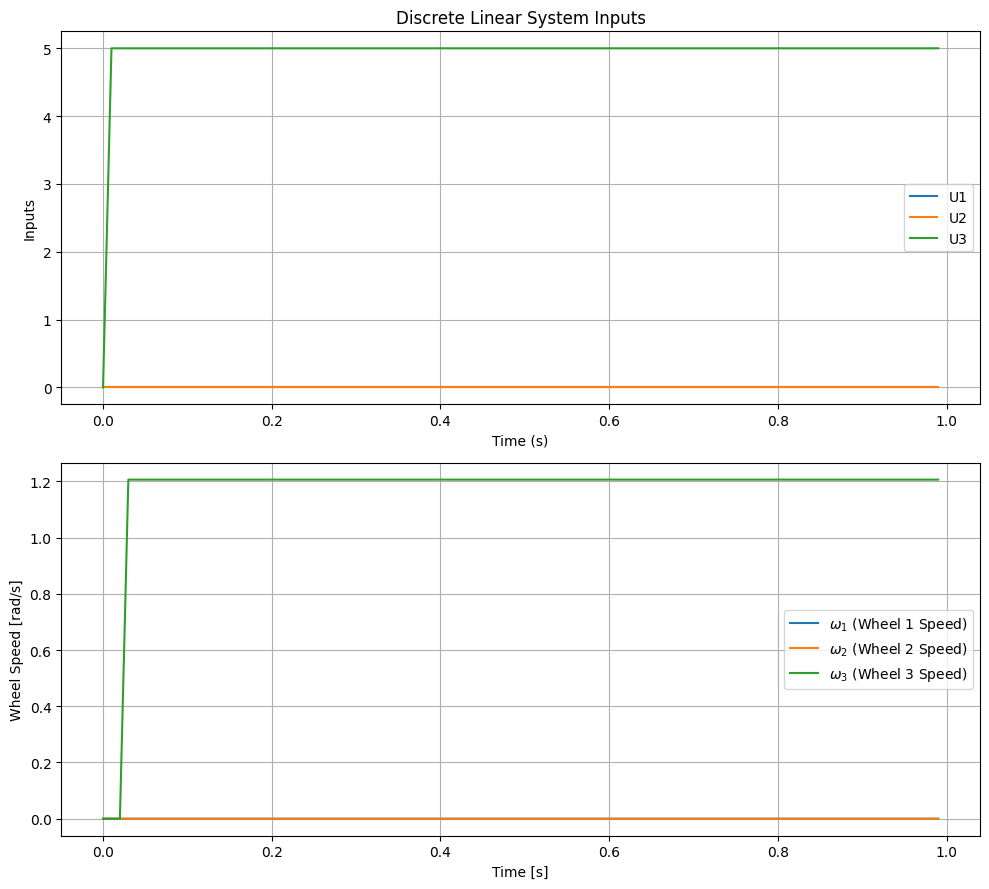

In [ ]:
# Simulation parameters
Ts = 0.01
time = 1
T = np.arange(0, time, Ts)
# ==========================
# 1) Construct the discrete linear system
# ==========================
Ts = 0.01

# Define the nonlinear system
io_sys = ct.nlsys(
    updfnc_omniwheel, outfnc_omniwheel, inputs=('u1', 'u2', 'u3'),
    outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
    name='omniwheel', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
)

# Find the equilibrium point
X0 = [0, 0, 0, 0, 0, 0]
eqpt = ct.find_eqpt(io_sys, X0, 0)
xeq = eqpt[0]

# Linearize the system at the equilibrium point
lin_omni = ct.linearize(io_sys, xeq, 0)
sys_z = ct.c2d(lin_omni, Ts, method='zoh')  # Convert to discrete-time system
A_z, B_z, C_z, D_z = sys_z.A, sys_z.B, sys_z.C, sys_z.D

sys_lin_z = ct.StateSpace(A_z, B_z, C_z, D_z, Ts)

# Define the initial state in the linearized space
# It must be a vector with as many dimensions as states in A_z
X0 = [0, 0, 0, 0, 0, 0]

# Desired angular velocity for each wheel (could come from a trajectory generator)
omega_ref = np.zeros((len(T), 3))
omega_ref[:, 0] = 0 * (np.mod(T, 1) < 1).astype(float)  # Example square pulse
omega_ref[:, 1] = 0 * (np.mod(T, 1) < 1).astype(float)
omega_ref[:, 2] = 5 * (np.mod(T, 1) < 1).astype(float)
omega_ref[0, 0] = 0
omega_ref[0, 1] = 0
omega_ref[0, 2] = 0

U_desired = omega_ref

dead_time = 0.01
N_delay = int(np.round(dead_time / Ts)) # N_delay = 2 pasos
zeros_delay = np.zeros((N_delay, 3))

U_shifted = U_desired[:-N_delay, :]

U_retardo = np.concatenate((zeros_delay, U_shifted), axis=0)

U = U_retardo # Sobreescribir U con el vector retardado

# ==========================
# 3) Simulate the discrete linear system
# ==========================
# input_output_response() simulates a StateSpace (or TransferFunction) model with input U
t_out, y_out = ct.input_output_response(sys_lin_z, T, U.T, X0)

# y_out has shape (#outputs, len(T)) => 6 rows if C_z is 6x6
# x_out has shape (#states, len(T)) => 6 rows

# ==========================
# 4) Plot results
# ==========================

fig, axs = plt.subplots(2, 1, figsize=(10, 9))

# 4.1) Plot control inputs
axs[0].plot(T, omega_ref[:, 0], label="U1")
axs[0].plot(T, omega_ref[:, 1], label="U2")
axs[0].plot(T, omega_ref[:, 2], label="U3")
axs[0].legend()
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Inputs")
axs[0].set_title("Discrete Linear System Inputs")
axs[0].grid()

# --- 5) Calculate Wheel Speeds (Inverse Kinematics) ---

# Get the parameters from the params dictionary (defined near the top of the file)
r = 0.0325
L = 0.099

# Inverse Kinematics Matrix (3-Wheel Omni-Robot)
# This matrix converts Vb=[dx, dy, dphi]^T to wheel speeds omega=[w1, w2, w3]^T
# NOTE: Verify the signs and angles based on your physical robot configuration!
J_inv = (1/r) * np.array([
    [ 0.5, -np.sqrt(3)/2.0,  L],      # Wheel 1 (330 degrees drive axis)
    [ 0.5,  np.sqrt(3)/2.0,  L],      # Wheel 2 (210 degrees drive axis)
    [-1.0,  0.0,             L]       # Wheel 3 (90 degrees drive axis)
])

# Extract the body velocities (dx, dy, dphi) from the simulation output 'y_out'
# Assuming dx, dy, dphi are the 4th, 5th, and 6th outputs (indices 3, 4, 5)
Vb = y_out[3:6, :] # Shape (3, len(T))

# Calculate the wheel speeds (omega = J_inv @ Vb)
# omega will have shape (3, len(T))
omega = J_inv @ Vb

# 4.2) Plot wheel speeds (NEW CODE)
axs[1].plot(T, omega[0, :], label="$\omega_1$ (Wheel 1 Speed)")
axs[1].plot(T, omega[1, :], label="$\omega_2$ (Wheel 2 Speed)")
axs[1].plot(T, omega[2, :], label="$\omega_3$ (Wheel 3 Speed)")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Wheel Speed [rad/s]")
# axs[1].axis(xmin=0,xmax=0.2)
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
def extract_fopdt_params(T, wheel_speed, U, deadtime):
  K = (wheel_speed[-1] - wheel_speed[0]) / (U[-1] - U[0])
  tau_limit = wheel_speed[-1] * 0.632
  tau = 0
  for i in range(len(wheel_speed)):
    if wheel_speed[i] > tau_limit:
      tau = T[i]
      break
  return K, tau - deadtime

K, tau = extract_fopdt_params(T, omega[2, :], omega_ref[:, 2], dead_time)
print(f"K: {K}, tau: {tau}")

K: 0.24117037856339346, tau: 0.019999999999999997


## Ziegler-Nichols

In [ ]:
def ziegler_nichols_openloop(type, L, T):
  if type == 'P':
    return T/L, 10e20, 0
  elif type == 'PI':
    return 0.9*T/L, L/0.3, 0
  elif type == 'PID':
    return 1.2*T/L, 2*L, 0.5*L

def ziegler_nichols_closedloop(type, Kcr, Pcr):
  if type == 'P':
    return 0.5*Kcr, 10e20, 0
  elif type == 'PI':
    return 0.45*Kcr, Pcr/1.2, 0
  elif type == 'PID':
    return 0.6*Kcr, 0.5*Pcr, 0.125*Pcr

Kc, ti, td = ziegler_nichols_openloop('PID', L=dead_time, T=0.02)
print(f"Kc: {Kc} [%Co/%To], ti: {ti}, td: {td}")

Kc: 2.4 [%Co/%To], ti: 0.02, td: 0.005


## Cohen-Coon

In [ ]:
def cohen_coon(type, k, theta, tau):
  if type == 'P':
    return (tau/k/theta)*(1+theta/3/tau), 0, 0
  elif type == 'PI':
    return (tau/k/theta)*(0.9+theta/12/tau), (theta*(30+3*theta/tau))/(9+20*theta/tau), 0
  elif type == 'PID':
    return (tau/k/theta)*(16+3*theta/tau)/12, (theta*(32+6*theta/tau))/(13+8*theta/tau), 4*theta/(11+2*theta/tau)
  else:
    print("Invalid type. Use 'P', 'PI', or 'PID'.")
    return None

Kc, ti, td = cohen_coon('PID', k=0.241, theta=dead_time, tau=0.02)
print(f"Kc: {Kc} [%Co/%To], ti: {ti}, td: {td}")

Kc: 12.102351313969573 [%Co/%To], ti: 0.02058823529411765, td: 0.0033333333333333335


## S to Z Domain

In [ ]:
def s_z_domain(Kp_cont, Ti_cont, Td_cont, Ts):
    # 1. Proportional Term (remains the same)
    Kp_disc = Kp_cont

    # 2. Integral Term (K_I = K_P / T_I)
    # The integral gain in the discrete positional form (Ki_z) is K_P * (Ts / T_I)
    if Ti_cont == 0:
        Ki_z = 0.0 # No integral action
    else:
        Ki_z = Kp_cont * (Ts / Ti_cont)

    # 3. Derivative Term (K_D = K_P * T_D)
    # The derivative gain constant (Kd_z) is K_P * (T_D / Ts)
    Kd_z = Kp_cont * (Td_cont / Ts)

    return {
        "Kp_disc": Kp_disc,
        "Ki_z": Ki_z,
        "Kd_z": Kd_z
    }
s_z_domain(Kp_cont=Kc, Ti_cont=ti, Td_cont=td, Ts=Ts)

{'Kp_disc': 2.4, 'Ki_z': 1.2, 'Kd_z': 1.2}